# Apparel Sales Forecasting & Customer Analytics 

## Project Overview
This project analyzes retail sales performance and customer behavior in a boutique-style apparel business.  
Using transactional and product-level data, the goal is to uncover insights about brand performance, seasonal demand, customer ratings, pricing strategies, and to build predictive models that forecast future sales trends.

---

## Objectives
- Perform **Exploratory Data Analysis** to understand patterns in sales, pricing, and customer satisfaction.  
- Identify **top-performing brands, seasons, and categories**.  
- Analyze **markdowns, stock quantities, and return behavior**.  
- Build a **forecasting model** to predict future sales/revenue.  
- Visualize insights through **clear, story-driven dashboards and charts**.

---

## Expected Outcomes
- Data-driven insights on sales performance and customer trends.  
- Visual dashboards highlighting brand, category, and seasonal performance.  
- Predictive model for sales forecasting and business planning.  

---


# 1. Exploratory Data Analysis

In [1]:
# Loading the dataset

import pandas as pd

df = pd.read_csv('../data/fashion_boutique_dataset.csv')

# Showing the first 5 rows

df.head()

,product_id,category,brand,season,size,color,original_price,markdown_percentage,current_price,purchase_date,stock_quantity,customer_rating,is_returned,return_reason
0,FB000001,Outerwear,Zara,Spring,XL,Red,196.01,0.0,196.01,2025-07-05,37,3.0,False,NaN
1,FB000002,Tops,Uniqlo,Winter,L,Pink,119.64,0.0,119.64,2025-08-06,2,2.5,False,NaN
2,FB000003,Accessories,Uniqlo,Winter,NaN,Black,33.80,0.0,33.80,2025-08-06,22,4.3,False,NaN
3,FB000004,Shoes,Uniqlo,Spring,XL,Black,75.36,0.0,75.36,2025-07-07,48,2.6,False,NaN
4,FB000005,Tops,Banana Republic,Winter,XL,Black,105.02,0.0,105.02,2025-08-06,10,NaN,False,NaN


In [2]:
# Dataset shape and info

# shape
print("Shape:", df.shape)

# column types and nulls
df.info()


Shape: (2176, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2176 entries, 0 to 2175
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           2176 non-null   object 
 1   category             2176 non-null   object 
 2   brand                2176 non-null   object 
 3   season               2176 non-null   object 
 4   size                 1685 non-null   object 
 5   color                2176 non-null   object 
 6   original_price       2176 non-null   float64
 7   markdown_percentage  2176 non-null   float64
 8   current_price        2176 non-null   float64
 9   purchase_date        2176 non-null   object 
 10  stock_quantity       2176 non-null   int64  
 11  customer_rating      1814 non-null   float64
 12  is_returned          2176 non-null   bool   
 13  return_reason        320 non-null    object 
dtypes: bool(1), float64(4), int64(1), object(8)
memory usage: 223.3+ KB


In [3]:
# Checking sum of missing values and duplicates

df.isnull().sum()

product_id                0
category                  0
brand                     0
season                    0
size                    491
color                     0
original_price            0
markdown_percentage       0
current_price             0
purchase_date             0
stock_quantity            0
customer_rating         362
is_returned               0
return_reason          1856
dtype: int64

In [4]:
# Duplicates

df.duplicated().sum()

0

### Summary

- The dataset contains **2,176 records** and **14 columns**.  
- Most columns are complete, but a few have missing data:
  - `size` — some products have no recorded size.  
  - `customer_rating` — some items don’t have customer ratings yet.  
  - `return_reason` — mostly missing, since not all products were returned.  
- There are **no duplicate rows** in the dataset.  


# Data Cleaning
----------
## Handling missing values

From the above summary we a few columns with missing data: mostly in **size**, **customer_rating**, and **return_reason**.  
Instead of dropping any rows, we are going to fill them in a way that makes sense for this dataset:

- For **size**, we'll use `"Unknown"` because some products (like accessories or shoes) don’t really have a size recorded.  
- For **customer_rating**, we'll fill the missing ones with the **average rating** to keep things balanced without losing any data.  
- For **return_reason**, we'll use `"No Return"` since most items weren’t returned, and missing values here simply mean there was no return reason to record.

This way, the dataset stays clean and complete, and we don’t lose any useful information for analysis.


In [5]:
# fill missing values
df['size'].fillna('Unknown', inplace=True)
df['customer_rating'].fillna(df['customer_rating'].mean(), inplace=True)
df['return_reason'].fillna('No Return', inplace=True)

# confirming if the changes took place
df.isnull().sum()


product_id             0
category               0
brand                  0
season                 0
size                   0
color                  0
original_price         0
markdown_percentage    0
current_price          0
purchase_date          0
stock_quantity         0
customer_rating        0
is_returned            0
return_reason          0
dtype: int64

## Feature Engineering

Now that the data is clean, We'll add a few new columns that will make the analysis easier later on.  
The first one is **`total_revenue`**, which shows how much each product earned based on its `current_price` and `stock_quantity`.


In [6]:
# creating total revenue column
df['total_revenue'] = df['current_price'] * df['stock_quantity']

# check the first few rows
df[['product_id', 'brand', 'current_price', 'stock_quantity', 'total_revenue']].head()


,product_id,brand,current_price,stock_quantity,total_revenue
0,FB000001,Zara,196.01,37,7252.37
1,FB000002,Uniqlo,119.64,2,239.28
2,FB000003,Uniqlo,33.80,22,743.60
3,FB000004,Uniqlo,75.36,48,3617.28
4,FB000005,Banana Republic,105.02,10,1050.20


### Converting Dates and Creating Time Features

To make time-based analysis easier, we'll first convert the **`purchase_date`** column into a proper datetime format.  
Then we'll extract a few useful details from it: like the **year**, **month**, and **day name**, which will help later when exploring sales patterns or seasonal trends.


In [7]:
# convert purchase_date to datetime
df['purchase_date'] = pd.to_datetime(df['purchase_date'])

# extract time features
df['year'] = df['purchase_date'].dt.year
df['month'] = df['purchase_date'].dt.month
df['day_name'] = df['purchase_date'].dt.day_name()

# check the first few rows
df[['purchase_date', 'year', 'month', 'day_name']].head()


,purchase_date,year,month,day_name
0,2025-07-05,2025,7,Saturday
1,2025-08-06,2025,8,Wednesday
2,2025-08-06,2025,8,Wednesday
3,2025-07-07,2025,7,Monday
4,2025-08-06,2025,8,Wednesday


### Descriptive summary

In [8]:
# summary of numerical columns
df.describe()

,original_price,markdown_percentage,current_price,purchase_date,stock_quantity,customer_rating,total_revenue,year,month
count,2176.000000,2176.000000,2176.000000,2176,2176.000000,2176.000000,2176.000000,2176.000000,2176.000000
mean,97.200340,12.144715,85.499596,2025-06-21 23:33:31.764705792,24.937960,2.986604,2126.107413,2024.899357,7.646140
min,15.140000,0.000000,7.290000,2024-08-06 00:00:00,0.000000,1.000000,0.000000,2024.000000,1.000000
25%,57.872500,0.000000,46.845000,2025-08-06 00:00:00,13.000000,2.200000,732.230000,2025.000000,8.000000
50%,88.600000,0.000000,74.885000,2025-08-06 00:00:00,25.000000,2.986604,1573.425000,2025.000000,8.000000
75%,127.630000,22.425000,112.865000,2025-08-06 00:00:00,37.000000,3.800000,2981.435000,2025.000000,8.000000
max,249.980000,59.900000,249.980000,2025-08-06 00:00:00,50.000000,5.000000,11667.390000,2025.000000,12.000000
std,51.637345,18.417786,50.091354,NaN,14.451387,1.058823,1905.031004,0.300925,1.778224


In [9]:
# unique counts for some key categorical columns
df[['category', 'brand', 'season', 'color', 'size']].nunique()

category     6
brand        8
season       4
color       11
size         7
dtype: int64

------------  
From the summary, most products have an **average price of around 97**, and the **average customer rating** sits close to **3 out of 5**.  
Stock quantities range widely, with some items having up to **50 units** in stock.

There are **6 product categories**, **8 brands**, **4 seasons**, **11 colors**, and **7 different sizes** : enough variety to uncover some interesting sales patterns later on.


# Visual Exploration

### i) Price and Revenue Distributions

Visualizing how prices and total revenues are spread out across products.  
These plots help show whether most items fall within a certain price range, or if there are a few very expensive products pulling the average up.  

Looking at the revenue distribution also gives a quick sense of how sales are performing overall: for example, whether most products bring in steady revenue or if only a few are driving the bulk of sales.


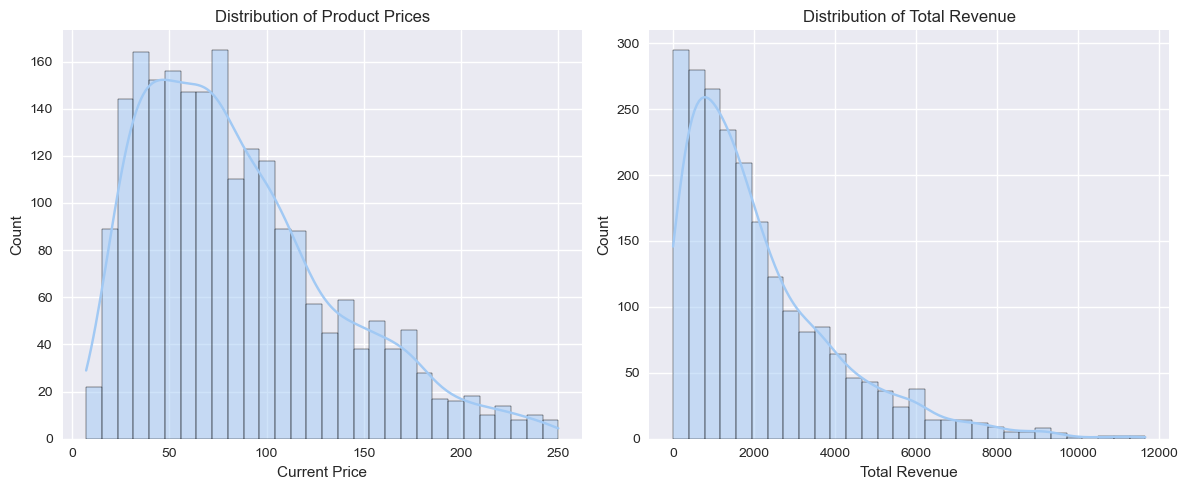

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# set up the style
plt.style.use('seaborn-v0_8')
sns.set_palette('pastel')

# create a figure layout
plt.figure(figsize=(12,5))

# plot 1: distribution of current prices
plt.subplot(1,2,1)
sns.histplot(df['current_price'], bins=30, kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Current Price')
plt.ylabel('Count')

# plot 2: distribution of total revenue
plt.subplot(1,2,2)
sns.histplot(df['total_revenue'], bins=30, kde=True)
plt.title('Distribution of Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


From the two charts above, most products are priced between **\$40** and **\$120**, with a few higher-end items reaching up to $250.  
The revenue distribution is heavily right-skewed, meaning only a small number of products generate very high sales, while most contribute smaller but steady amounts.  

### ii) Customer Ratings Distribution

Next, getting a quick sense of how customers rated different products.  
This helps show the overall satisfaction level: whether most products are rated well or if there’s a mix of good and poor ratings.  
It’s also a nice way to spot any skew, like if ratings mostly lean toward the high end (which could mean happy customers) or if there’s a wide spread.

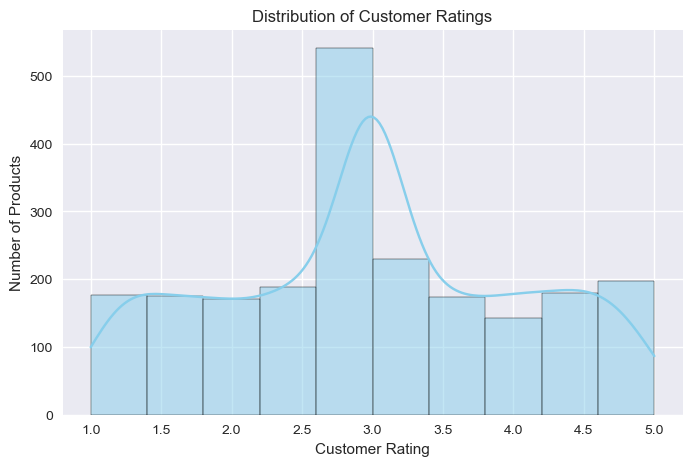

In [11]:
# customer ratings distribution plot
plt.figure(figsize=(8,5))
sns.histplot(df['customer_rating'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Customer Ratings')
plt.xlabel('Customer Rating')
plt.ylabel('Number of Products')
plt.show()


From the chart, most products have customer ratings centered around **3 out of 5**, showing an overall average satisfaction level.  
There are fewer products rated below 2 or above 4.5, meaning only a small number of items are either poorly received or extremely well-rated.  

This kind of spread suggests that while customers are generally satisfied, there’s room for improvement to push more products toward higher ratings.


### iii) Brand Performance: Average Revenue & Ratings

Next, we are going to see how different brands perform in terms of both **sales** and **customer satisfaction**.  
By comparing the average total revenue and average customer rating for each brand, it’s easier to spot which ones are doing well overall, not just selling more, but also keeping customers happy.  

This kind of comparison helps highlight strong performers and identify brands that might need improvement either in pricing strategy or product quality.


In [12]:
# group by brand and calculate average revenue and rating
brand_summary = df.groupby('brand')[['total_revenue', 'customer_rating']].mean().reset_index()

# sort by revenue (highest first)
brand_summary = brand_summary.sort_values(by='total_revenue', ascending=False)

# show top few
brand_summary.head()


,brand,total_revenue,customer_rating
5,Mango,2291.821197,2.809896
6,Uniqlo,2251.929962,3.090092
1,Banana Republic,2160.512561,3.002656
7,Zara,2111.133355,2.917797
0,Ann Taylor,2110.305720,3.074593


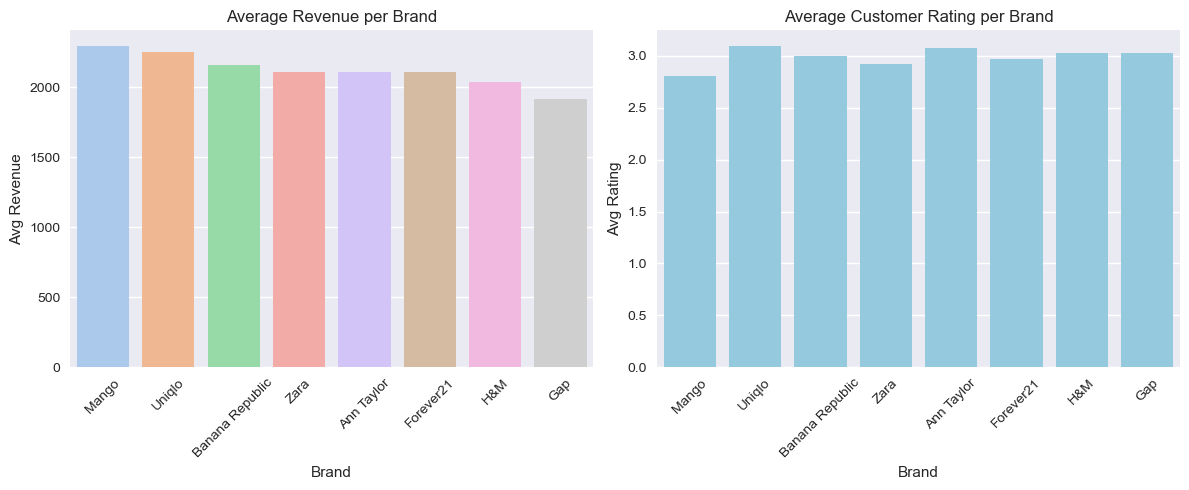

In [13]:
# visualize brand performance
plt.figure(figsize=(12,5))

# bar plot for average revenue
plt.subplot(1,2,1)
sns.barplot(data=brand_summary, x='brand', y='total_revenue')
plt.title('Average Revenue per Brand')
plt.xticks(rotation=45)
plt.xlabel('Brand')
plt.ylabel('Avg Revenue')

# bar plot for average customer rating
plt.subplot(1,2,2)
sns.barplot(data=brand_summary, x='brand', y='customer_rating', color='skyblue')
plt.title('Average Customer Rating per Brand')
plt.xticks(rotation=45)
plt.xlabel('Brand')
plt.ylabel('Avg Rating')

plt.tight_layout()
plt.show()


From the charts above, **Mango** and **Uniqlo** stand out as the top-performing brands in terms of average revenue, both generating above 2,200 on average.  
Interestingly, while **Mango** leads in sales, **Uniqlo** and **Ann Taylor** have slightly higher customer ratings, suggesting stronger customer satisfaction.  

Overall, the differences across brands are not too extreme, but it’s clear that the top few brands manage to balance both **good sales** and **decent customer feedback**, making them strong performers in this dataset.


### iv) Category Performance: Average Revenue & Ratings
After looking at brand performance, next we'll see how different product categories compare.  
This helps identify which types of products drive the most revenue and which ones customers rate highest.


In [14]:
# group by category to find average revenue and rating
category_summary = (
    df.groupby('category')[['total_revenue', 'customer_rating']]
    .mean()
    .reset_index()
    .sort_values(by='total_revenue', ascending=False)
)

# view summary
category_summary


,category,total_revenue,customer_rating
3,Outerwear,3654.251018,2.921067
4,Shoes,2737.163226,3.039936
2,Dresses,2461.404448,3.009201
5,Tops,1610.689164,2.971557
1,Bottoms,1482.823112,3.010431
0,Accessories,1114.168881,2.964088


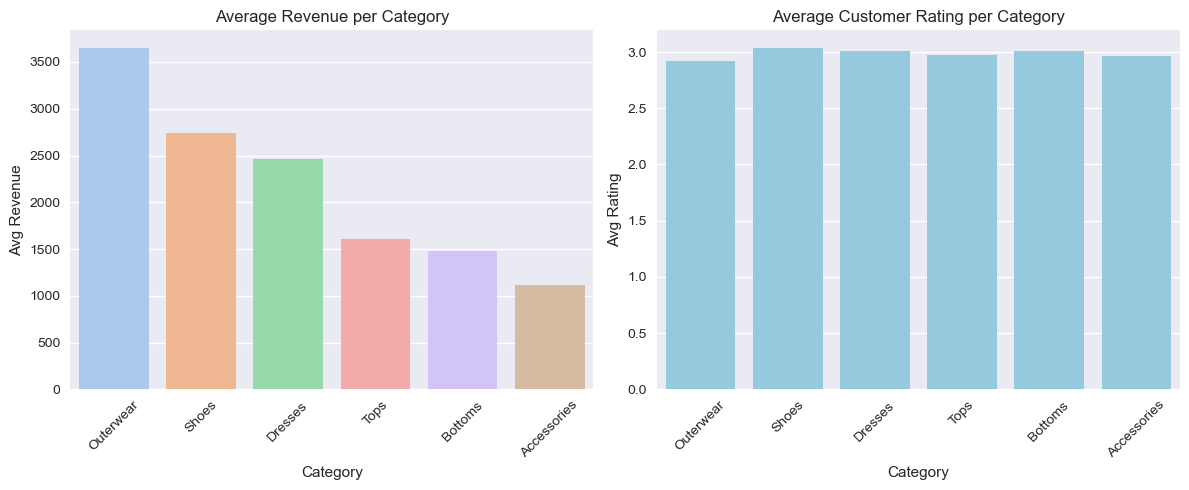

In [15]:
plt.figure(figsize=(12,5))

# avg revenue by category
plt.subplot(1,2,1)
sns.barplot(data=category_summary, x='category', y='total_revenue')
plt.title('Average Revenue per Category')
plt.xlabel('Category')
plt.ylabel('Avg Revenue')
plt.xticks(rotation=45)

# avg rating by category
plt.subplot(1,2,2)
sns.barplot(data=category_summary, x='category', y='customer_rating', color='skyblue')
plt.title('Average Customer Rating per Category')
plt.xlabel('Category')
plt.ylabel('Avg Rating')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


From the charts above, **Outerwear** is the top-performing category in terms of revenue, bringing in the highest average sales overall.  
**Shoes** and **Dresses** follow closely, both showing strong performance and slightly better customer ratings around 3.0.  

Although **Accessories** have the lowest revenue, their customer ratings are fairly similar to other categories, which might mean they’re lower-priced but still appreciated by customers.  
Overall, categories like **Outerwear** and **Shoes** seem to drive the most value for the store.


### v) Correlation Analysis: Price, Markdown, Revenue & Rating

To wrap up the exploratory phase, lets see how key numeric features relate to each other.    
This helps reveal patterns: like whether higher prices tend to generate more revenue, or if markdowns (discounts) impact customer ratings and sales.

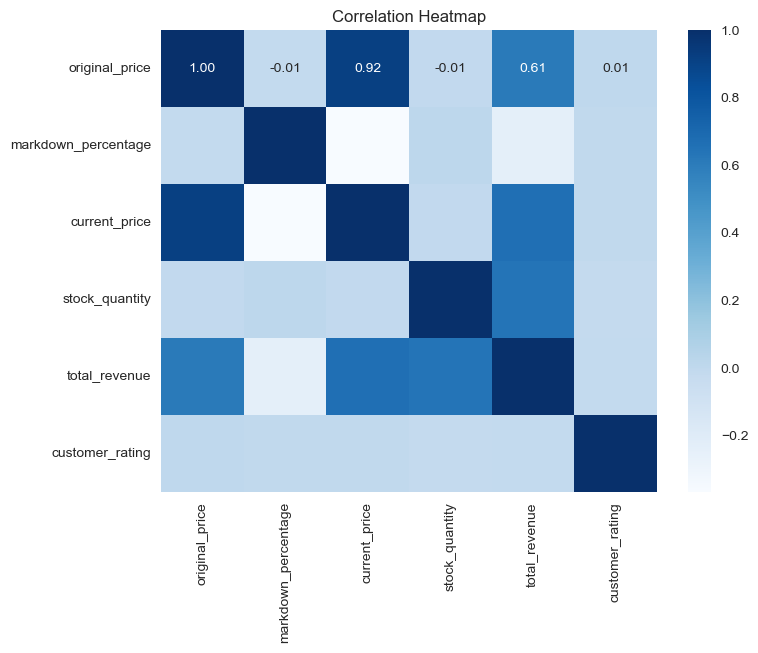

In [16]:
# selecting numerical columns for correlation
num_cols = ['original_price', 'markdown_percentage', 'current_price', 'stock_quantity', 'total_revenue', 'customer_rating']

# calculate correlation
corr = df[num_cols].corr()

# visualize correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


From the heatmap above:

- **Original Price** and **Current Price** show a very strong positive correlation (**0.92**), meaning higher-priced items usually stay high even after markdowns.  
- **Stock Quantity** also has a moderate positive correlation (**0.61**) with **Total Revenue**, which makes sense: more stock generally leads to more potential sales.  
- **Markdown Percentage** has almost no correlation with other features, suggesting discounts don’t strongly affect pricing or revenue in this dataset.  
- **Customer Rating** shows almost no relationship with price or revenue, implying that customer satisfaction doesn’t depend much on how expensive a product is.

Overall, the data suggests that **price and stock** are the main drivers of revenue, while **ratings** and **markdowns** don’t play a major role statistically, though they might still influence customer perception in real scenarios.
